Modeling California Housing Prices

In [52]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [53]:
#Importing housing data from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
display(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
Cal_housing = pd.DataFrame(housing.data, columns = housing.feature_names)
Cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding Median house value as target column with the Cal_housing

In [55]:
Cal_housing['MHV']=housing.target
Cal_housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [56]:
Cal_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [57]:
Cal_housing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MHV           0
dtype: int64

In [58]:
print('Data info',Cal_housing.info)
print('Data shape',Cal_housing.shape)

Data info <bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37  

Text(0.5, 1.0, 'Correlation between all the variables')

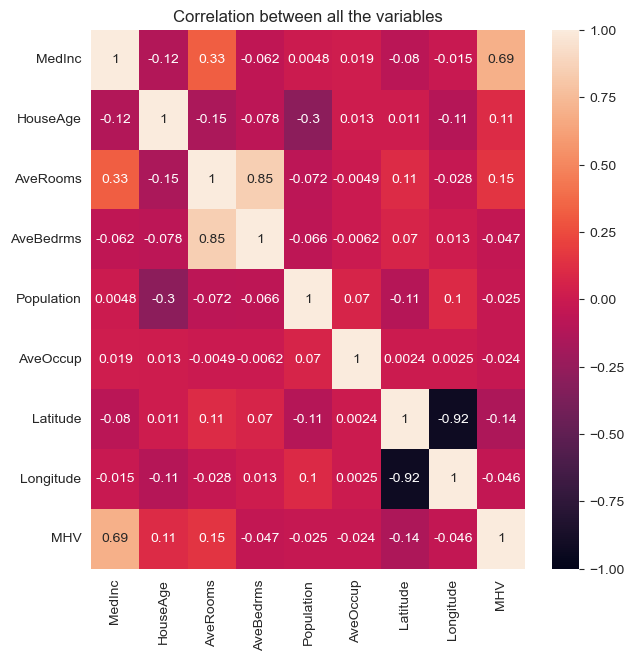

In [59]:
plt.figure(figsize=(7,7))
sns.heatmap(Cal_housing.corr(),annot=True,vmin=-1,vmax=1)
plt.title('Correlation between all the variables')

There is a strong correlation of MHV with MedInc, Latitude and AveRooms

Text(0.5, 1.0, 'Median house value distribution')

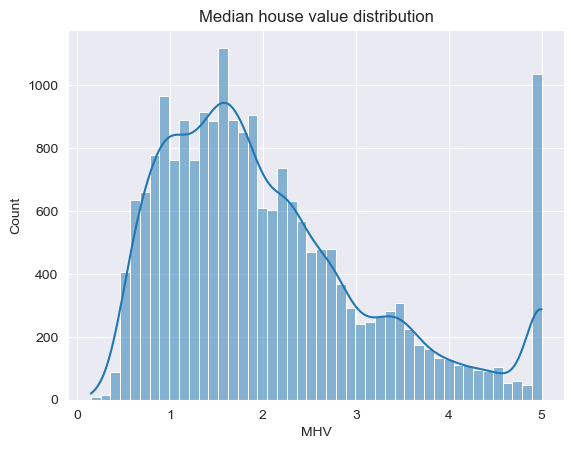

In [60]:
sns.histplot(data=Cal_housing , x='MHV', kde = True)
plt.title('Median house value distribution')

In [61]:
# for f in housing.feature_names:
#     ax=plt.subplots(figsize=(4,4))
#     ax=sns.regplot(x=Cal_housing[f],y=Cal_housing['MHV'])
#     plt.show()

In [62]:
X = Cal_housing[['MedInc','Latitude','AveRooms','HouseAge']]
#X = Cal_housing.drop(['MHV'],axis=1)
Y = Cal_housing['MHV']

Model Building

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
lr = LinearRegression()
lr.fit(X,Y)
y_pred = lr.predict(X)
rmse = np.sqrt(mean_squared_error(Y,y_pred))
r2= r2_score(Y,y_pred)

print("RMSE is", rmse)
print("R2 is", r2)
print("Model coeff", lr.coef_)
# ax=sns.regplot(x=Y,y=y_pred)

RMSE is 0.8003129943648678
R2 is 0.5189810787396392
Model coeff [ 0.43628863 -0.04541206 -0.02124199  0.01696997]


In [65]:
pickle.dump(lr, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
# print(model.predict([[2, 2200, 5]]))

In [66]:
# np.mean(cross_val_score(lr, X, Y, n_jobs=1, cv=5))

In [67]:
# lr = Lasso()
# lr.fit(X,Y)
# y_pred = lr.predict(X)
# rmse = np.sqrt(mean_squared_error(Y,y_pred))
# r2= r2_score(Y,y_pred)
#
# print("RMSE is", rmse)
# print("R2 is", r2)
# print("Model coeff", lr.coef_)
# sns.regplot(x=Y,y=y_pred)


In [68]:
# np.mean(cross_val_score(lr, X, Y, n_jobs=1, cv=5))

In [69]:
# lr = Ridge()
# lr.fit(X,Y)
# y_pred = lr.predict(X)
# rmse = np.sqrt(mean_squared_error(Y,y_pred))
# r2= r2_score(Y,y_pred)
#
# print("RMSE is", rmse)
# print("R2 is", r2)
# print("Model coeff", lr.coef_)
# sns.regplot(x=Y,y=y_pred)

In [70]:
#np.mean(cross_val_score(lr, X, Y, n_jobs=1, cv=5))